In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

def plotDistribGraph(pdf):
    fig, a = plt.subplots(ncols=1, figsize=(16, 5))
    a.set_title("Distributions")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    plt.show()

def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.show()

def plotGraphAll(pdf, pscaled1, pscaled2, pscaled3):
    fig, (a, b, c, d) = plt.subplots(ncols=4, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("RobustScaler")
    for col in pscaled1.columns:
        sns.kdeplot(pscaled1[col], ax=b)
    c.set_title("MinMaxScaler")
    for col in pscaled2.columns:
        sns.kdeplot(pscaled2[col], ax=c)
    d.set_title("StandardScaler")
    for col in pscaled3.columns:
        sns.kdeplot(pscaled3[col], ax=d)
    plt.show()
    
np.random.seed(1)
NBROWS = 5000
df = pd.DataFrame({
    'A': np.random.normal(0, 2, NBROWS),
    'B': np.random.normal(5, 3, NBROWS),
    'C': np.random.normal(-5, 5, NBROWS),  
    'D': np.random.chisquare(8, NBROWS),
    'E': np.random.beta(8, 2, NBROWS) * 40,
    'F': np.random.normal(5, 3, NBROWS)
}

Génération aléatoire de jeux de données

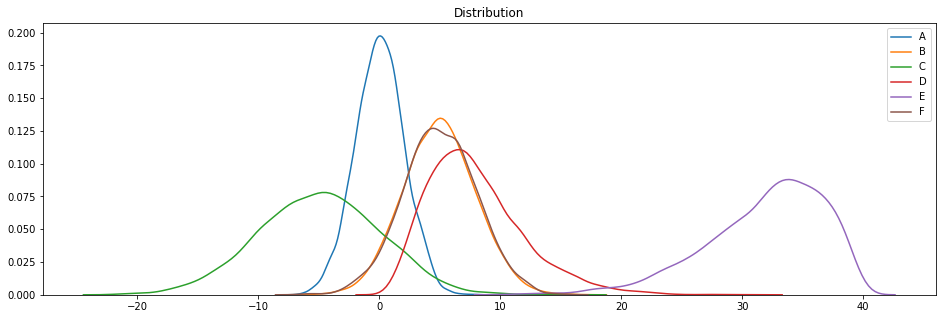

In [35]:
plotDistribGraph(df)

## Utilisation de MaxAbsScaler

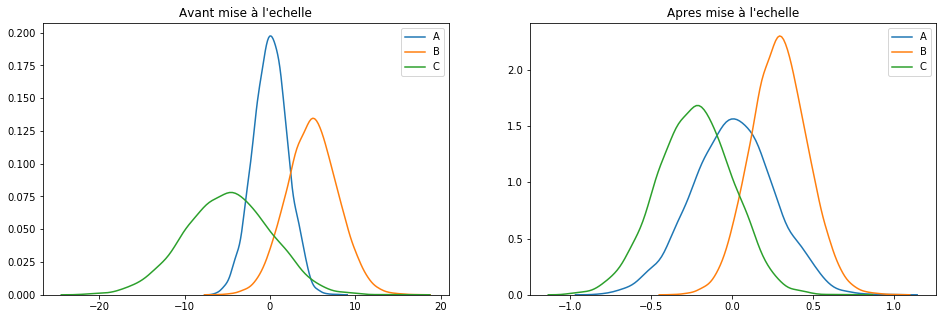

In [28]:
scaler = MaxAbsScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

## Utilisation de StandardScaler

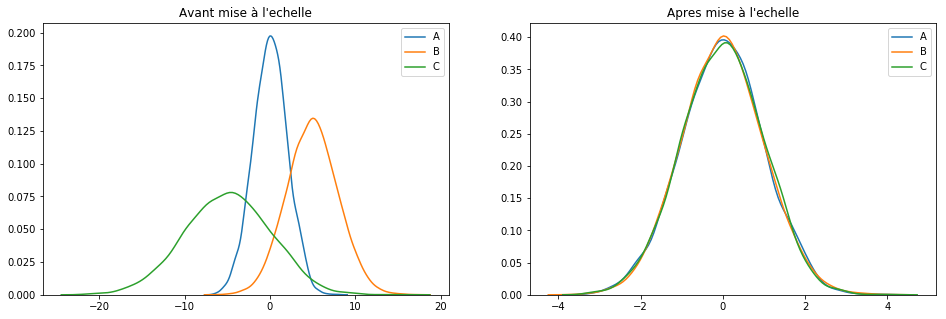

In [26]:
scaler = StandardScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

## Utilisation de MinMaxScaler

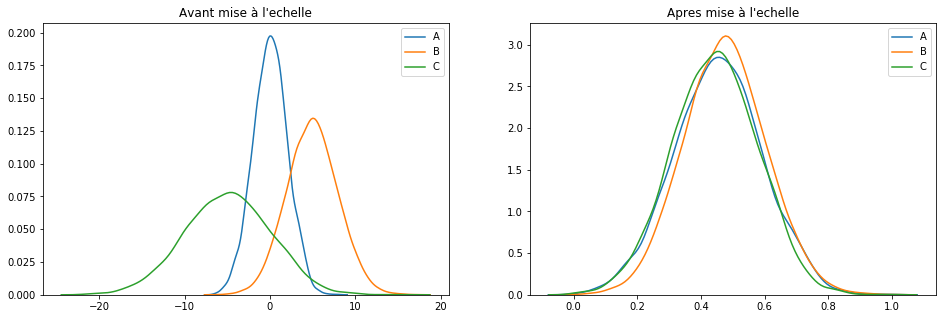

In [24]:
scaler = MinMaxScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

## Utilisation de RobustScaler

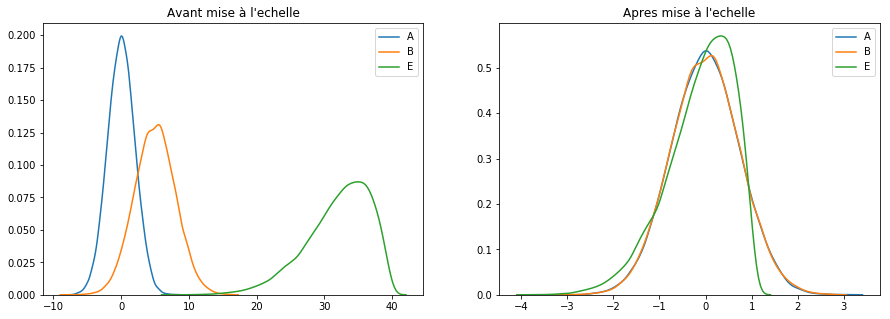

In [28]:
scaler = RobustScaler()
keepCols = ['A', 'B', 'E']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

### Comparaison avec MinMaxScaler

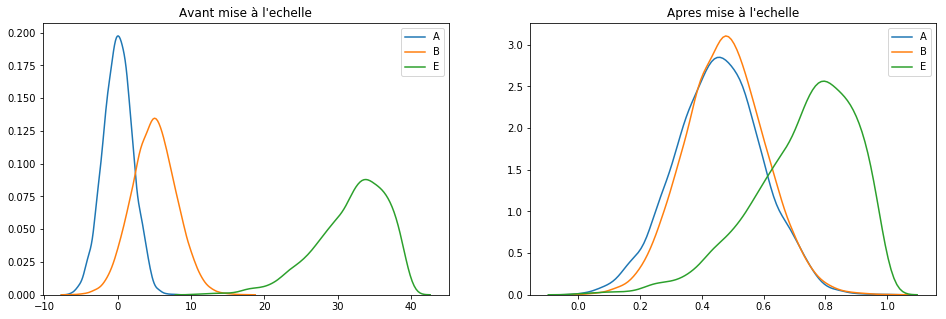

In [44]:
scaler = MinMaxScaler()
keepCols = ['A', 'B', 'E']
scaled_df = scaler.fit_transform(df[keepCols])
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

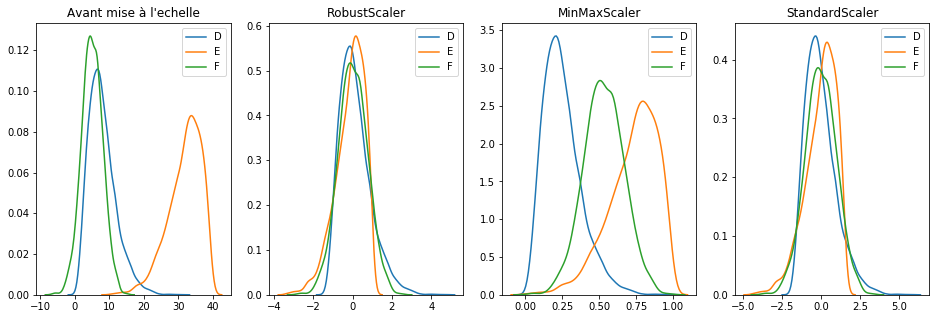

In [20]:
scaler1 = RobustScaler()
scaler2 = MinMaxScaler()
scaler3 = StandardScaler()
keepCols = ['D', 'E', 'F'] # ['A', 'E', 'D']
dfscaler1 = scaler1.fit_transform(df[keepCols])
dfscaler1 = pd.DataFrame(dfscaler1, columns=keepCols)
dfscaler2 = scaler2.fit_transform(df[keepCols])
dfscaler2 = pd.DataFrame(dfscaler2, columns=keepCols)
dfscaler3 = scaler3.fit_transform(df[keepCols])
dfscaler3 = pd.DataFrame(dfscaler3, columns=keepCols)
plotGraphAll(df[keepCols], dfscaler1, dfscaler2, dfscaler3)